$
u(x, t) = u(x, t - \Delta t) - \frac {sin(x) \Delta t}{\Delta x} [u(x + \Delta x, t - \Delta t) - u(x, t - \Delta t)]
$


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from mesh import Mesh

In [7]:
def function(A, t, x):
    return A[t - 1][x] - np.sin(x)

dt = 0.001
t_min = 0
t_max = 0.5

dx = 0.1
x_min = -1
x_max = 1

m = Mesh(function, dt, t_min, t_max, dx, x_min, x_max)
m.set_initial_condition(
    np.zeros((m.n_t,)),
    np.zeros((m.n_t,)),
    np.ones((m.n_x,)),
).evaluate();

In [8]:
import pandas as pd

mesh_df = pd.DataFrame(m.get_mesh());

In [9]:
mesh_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
1,0.0,0.158529,0.090703,0.85888,1.756802,1.958924,1.279415,0.343013,0.010642,0.587882,1.544021,1.999990,1.536573,0.579833,0.009393,0.349712,1.287903,1.961397,1.750987,0.0
2,0.0,-0.682942,-0.818595,0.71776,2.513605,2.917849,1.558831,-0.313973,-0.978716,0.175763,2.088042,2.999980,2.073146,0.159666,-0.981215,-0.300576,1.575807,2.922795,2.501974,0.0
3,0.0,-1.524413,-1.727892,0.57664,3.270407,3.876773,1.838246,-0.970960,-1.968075,-0.236355,2.632063,3.999971,2.609719,-0.260501,-1.971822,-0.950864,1.863710,3.884192,3.252962,0.0
4,0.0,-2.365884,-2.637190,0.43552,4.027210,4.835697,2.117662,-1.627946,-2.957433,-0.648474,3.176084,4.999961,3.146292,-0.680668,-2.962429,-1.601151,2.151613,4.845590,4.003949,0.0


In [10]:
mesh_df.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
495,0.0,-415.528137,-449.102226,-68.854404,375.617235,475.667516,139.310672,-324.208366,-488.732332,-202.998650,270.290450,495.995152,266.603594,-206.982683,-489.350641,-320.892481,143.512142,476.891758,372.738687,0.0
496,0.0,-416.369608,-450.011524,-68.995524,376.374038,476.626440,139.590087,-324.865353,-489.721690,-203.410769,270.834471,496.995142,267.140167,-207.402850,-490.341248,-321.542769,143.800045,477.853156,373.489674,0.0
497,0.0,-417.211079,-450.920821,-69.136644,377.130840,477.585365,139.869503,-325.522340,-490.711049,-203.822887,271.378492,497.995133,267.676740,-207.823017,-491.331856,-322.193057,144.087948,478.814553,374.240662,0.0
498,0.0,-418.052550,-451.830119,-69.277764,377.887643,478.544289,140.148918,-326.179326,-491.700407,-204.235006,271.922513,498.995123,268.213313,-208.243184,-492.322463,-322.843344,144.375852,479.775951,374.991649,0.0
499,0.0,-418.894021,-452.739416,-69.418884,378.644445,479.503213,140.428334,-326.836313,-492.689765,-204.647124,272.466534,499.995113,268.749886,-208.663351,-493.313070,-323.493632,144.663755,480.737348,375.742636,0.0


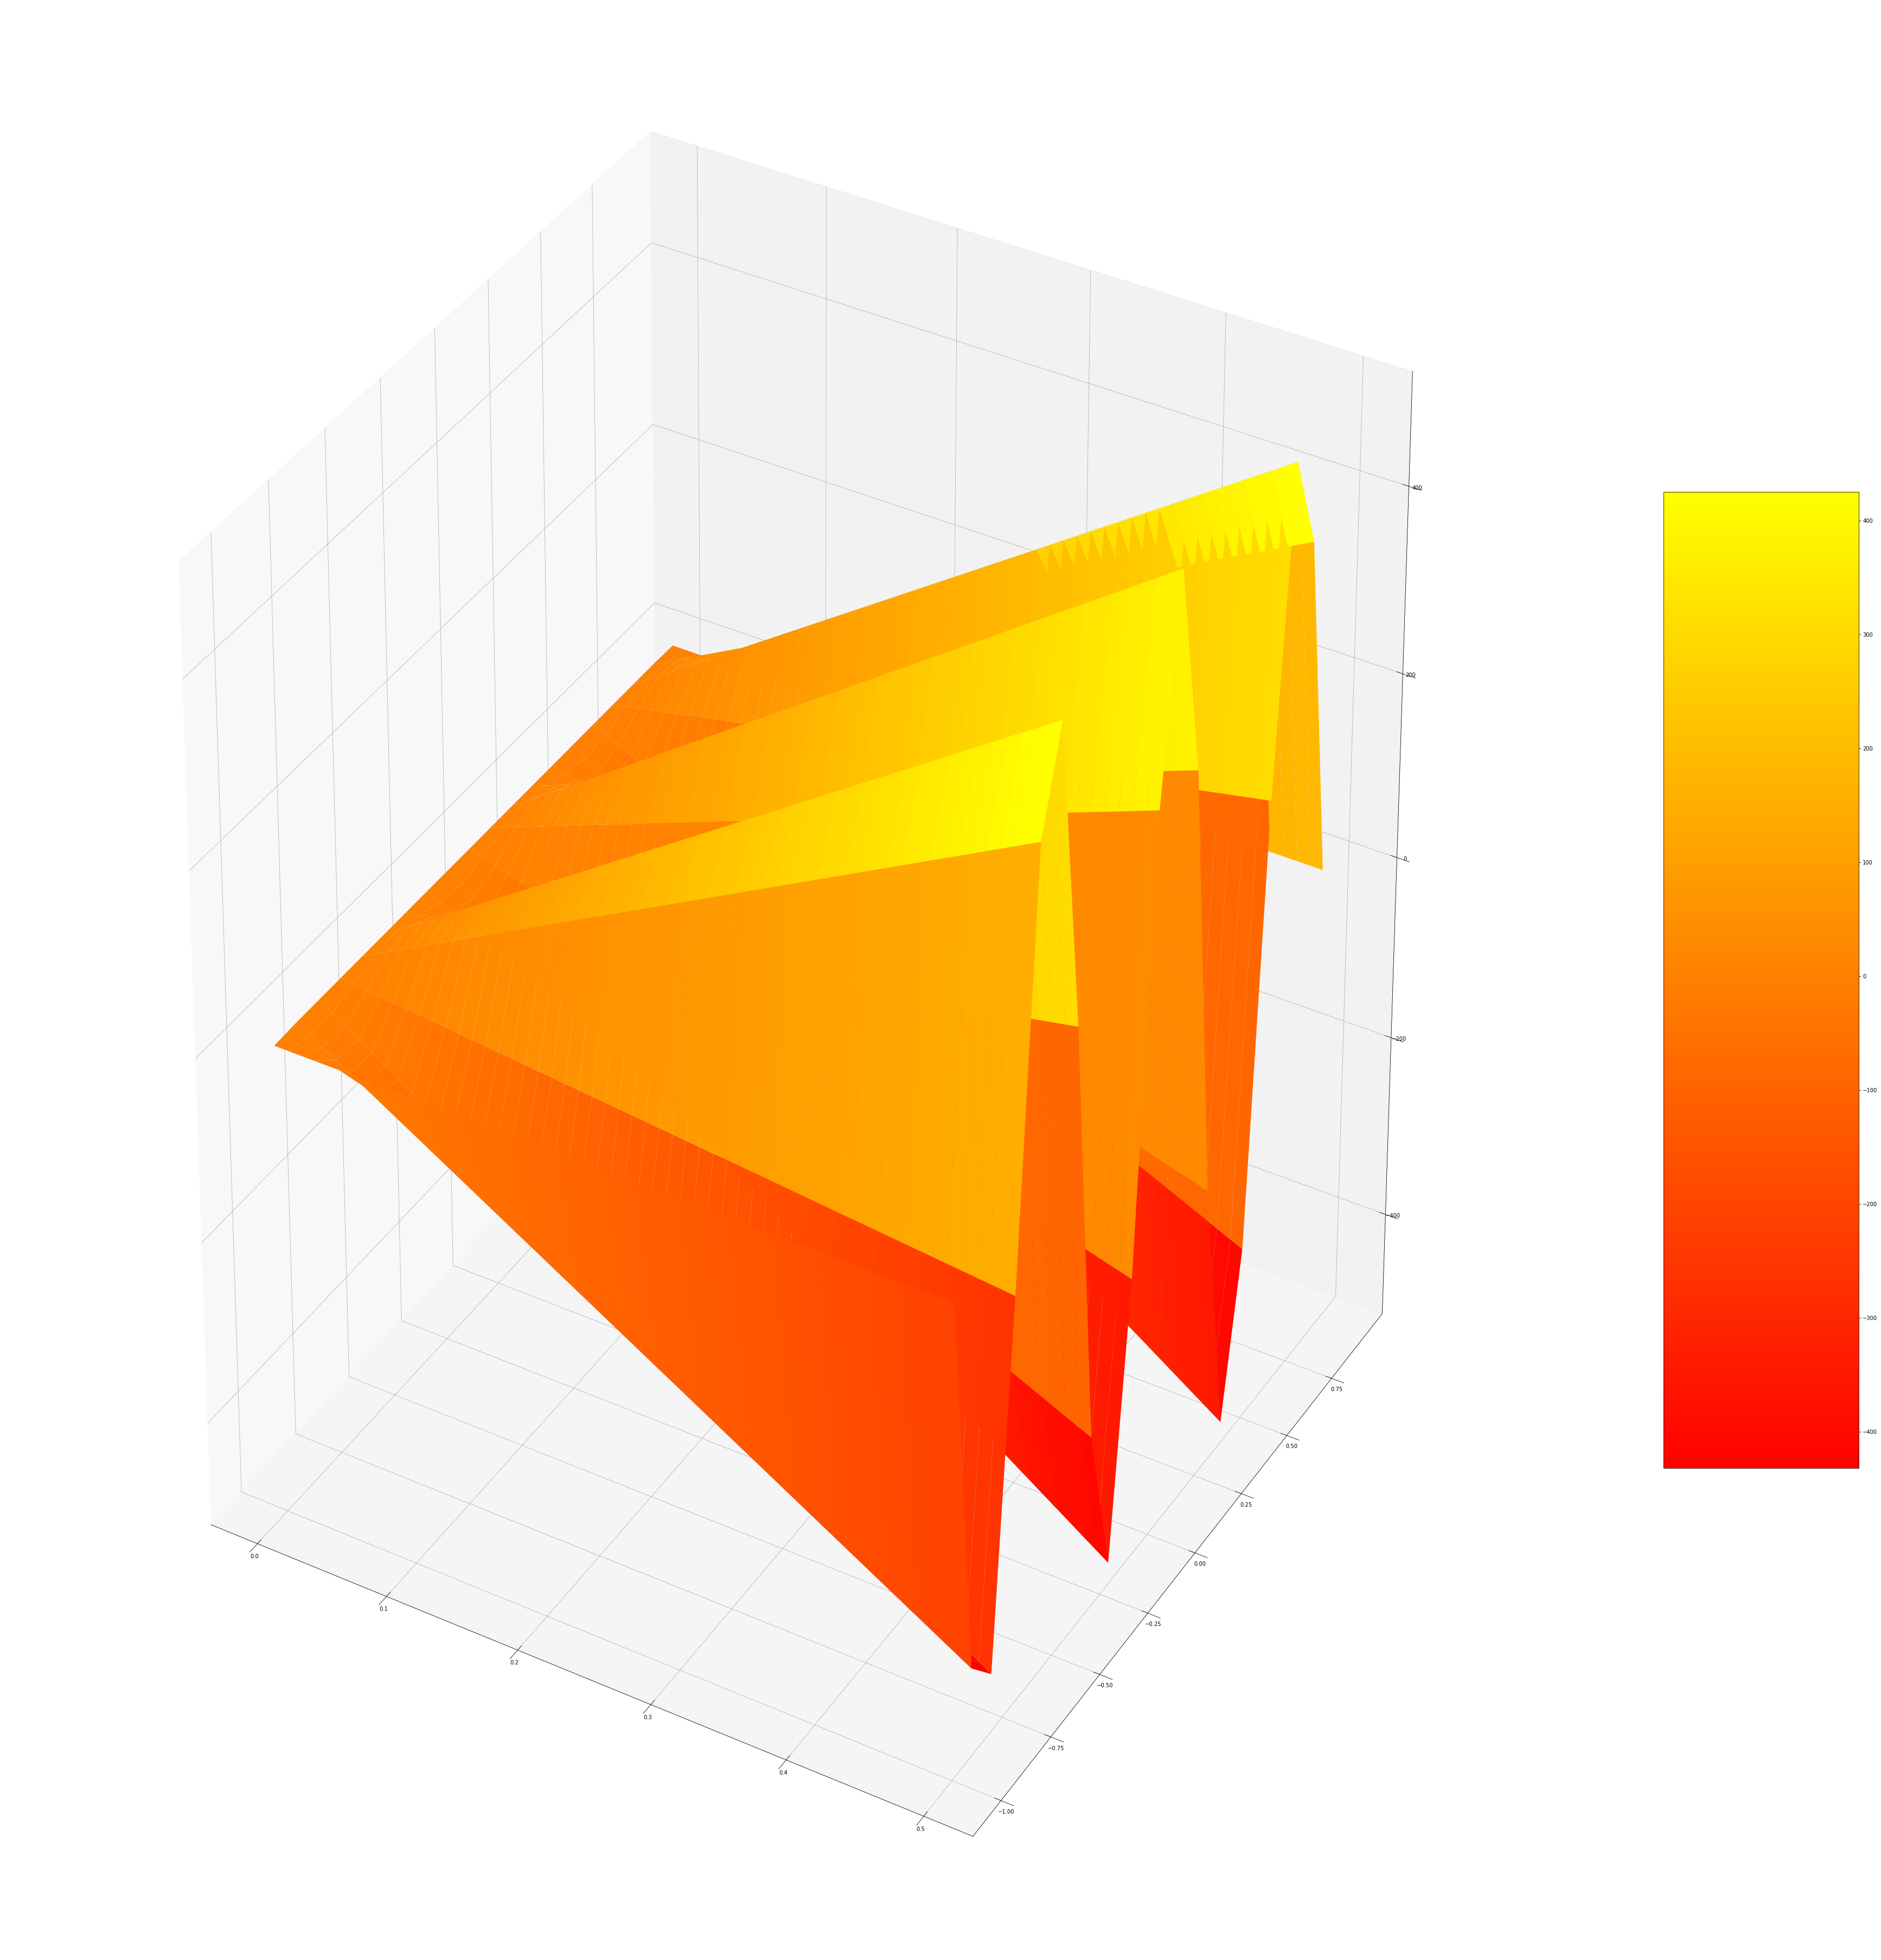

In [11]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

fig = plt.figure(figsize=(50, 50))
ax = Axes3D(fig)

T = np.arange(t_min, t_max, dt)
X = np.arange(x_min, x_max, dx)
T, X = np.meshgrid(T, X)
U = m.get_mesh()

surf = ax.plot_surface(T, X, U.T, cmap=cm.autumn)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [12]:
U.T.shape

(20, 500)